In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import graphviz

In [11]:
sns.set_style("darkgrid")

In [2]:
# Importing the data set
df = pd.read_csv("Weather_data.csv")

In [3]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [6]:
# to remove the weird space in front of parameter names
df.columns = map(lambda x: x.strip(), df.columns)

In [7]:
df.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm'],
      dtype='object')

In [8]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [9]:
df['_conds'].value_counts(ascending=False)

Haze                             46887
Smoke                            20334
Mist                              8999
Clear                             3129
Widespread Dust                   2830
Fog                               2541
Scattered Clouds                  2197
Partly Cloudy                     2064
Shallow Fog                       1859
Mostly Cloudy                     1520
Light Rain                        1297
Partial Fog                        962
Patches of Fog                     816
Thunderstorms and Rain             471
Light Drizzle                      410
Heavy Fog                          407
Rain                               394
Unknown                            378
Blowing Sand                       358
Overcast                           313
Thunderstorm                       190
Light Thunderstorms and Rain       170
Drizzle                            111
Light Thunderstorm                  63
Light Fog                           52
Heavy Rain               

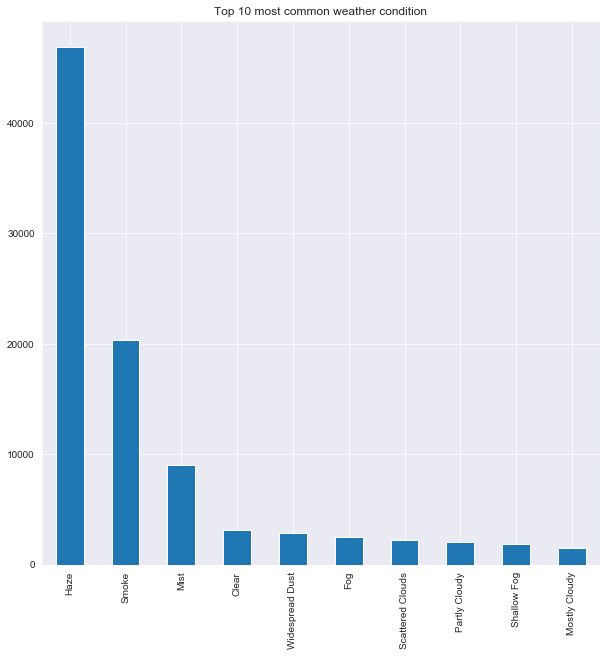

In [14]:
# Lets plot top 10 weather condition in delhi.
plt.figure(figsize=(10, 10));
df['_conds'].value_counts().head(10).plot(kind='bar');
plt.title("Top 10 most common weather condition")
plt.plot();

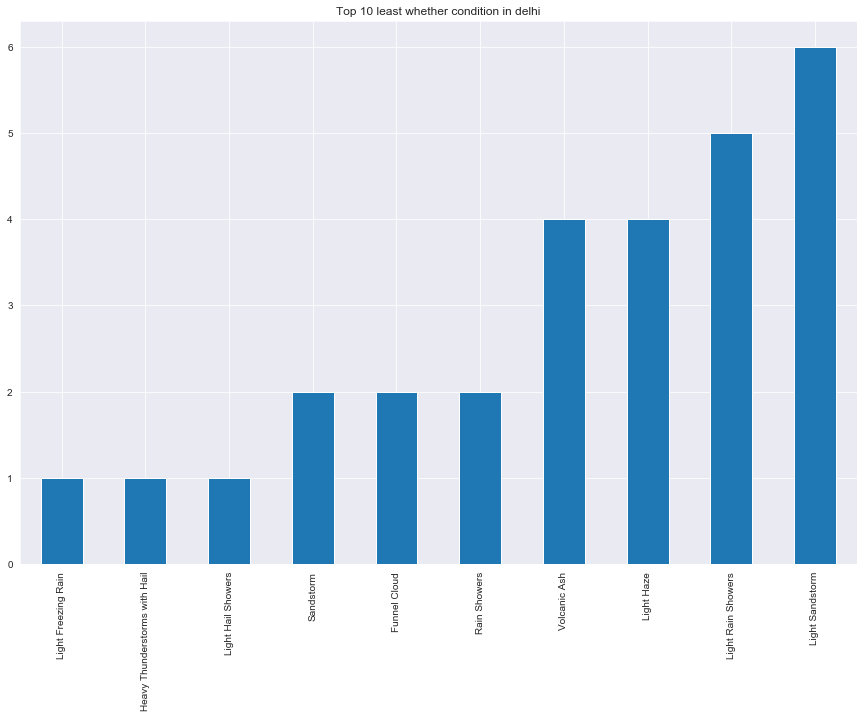

In [15]:
# Lets see top 10 least condition
plt.figure(figsize=(15, 10));
df['_conds'].value_counts(ascending=True).head(10).plot(kind="bar");
plt.title("Top 10 least whether condition in delhi");
plt.plot();

In [17]:
# common wind direction
df['_wdire'].value_counts()

North       18854
West        11414
WNW          7211
East         7092
NW           6908
WSW          5378
ESE          5249
ENE          3685
SE           3462
SW           3153
NNW          2647
NE           2470
SSE          2034
NNE          1731
SSW          1706
South        1534
Variable        5
Name: _wdire, dtype: int64

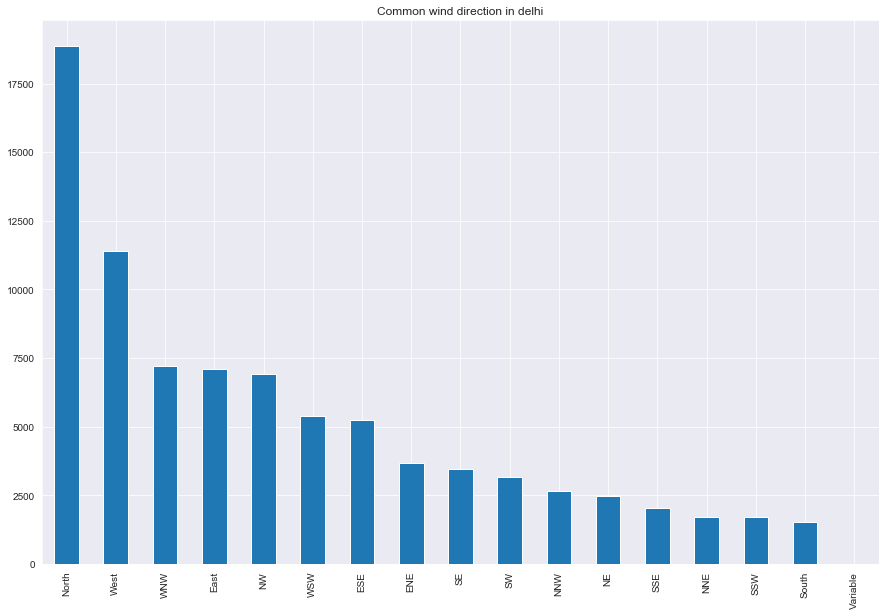

In [18]:
plt.figure(figsize=(15, 10));
plt.title("Common wind direction in delhi");
df['_wdire'].value_counts().plot(kind="bar");
plt.plot();

In [24]:
# Average temprature
print("average temprature in delhi:", round(df['_tempm'].mean(),3), "degree celsius")

average temprature in delhi: 25.578 degree celsius


In [25]:
# fxn for extracting date from datetime column
def extract_year(value):
    return (value[0:4])

In [26]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [27]:
# function to get month
def extract_month(value):
    return (value[4:6])

In [28]:
# Lets check our method
df["year"] = df["datetime_utc"].apply(lambda x:extract_year(x))
df["month"] = df["datetime_utc"].apply(lambda x:extract_month(x))

In [29]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,...,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,...,0,0,5.0,280.0,West,NaN,NaN,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,...,0,0,2.0,0.0,North,NaN,NaN,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,...,0,0,1.2,0.0,North,NaN,NaN,0.0,1996,11


In [30]:
# lets check out data range
print("max, min: ", df.year.max(), ",", df.year.min())

max, min:  2016 , 1996


In [31]:
# Number of records for paticular year
df.year.value_counts()

2003    13186
2004     9151
2002     8503
2001     8403
1997     6513
1999     6300
2016     5977
2000     5391
1998     3579
2014     2973
2015     2936
2005     2920
2007     2865
2006     2858
2008     2857
2009     2851
2010     2768
2011     2738
2012     2438
2013     2428
1996     1278
Name: year, dtype: int64

In [32]:
df.groupby("year")['_tempm'].mean()

year
1996    16.518636
1997    24.444635
1998    24.847371
1999    27.335731
2000    23.865647
2001    25.582460
2002    26.481948
2003    26.176556
2004    26.004396
2005    24.712715
2006    25.449245
2007    24.800211
2008    24.525744
2009    25.355360
2010    25.553338
2011    24.966362
2012    25.024661
2013    24.679222
2014    25.175735
2015    25.141832
2016    28.367864
Name: _tempm, dtype: float64

In [33]:
df_mean = df.groupby("year")['_tempm'].mean().reset_index().sort_values('_tempm', ascending=True)

In [34]:
df_mean.year = df_mean.year.astype("float")

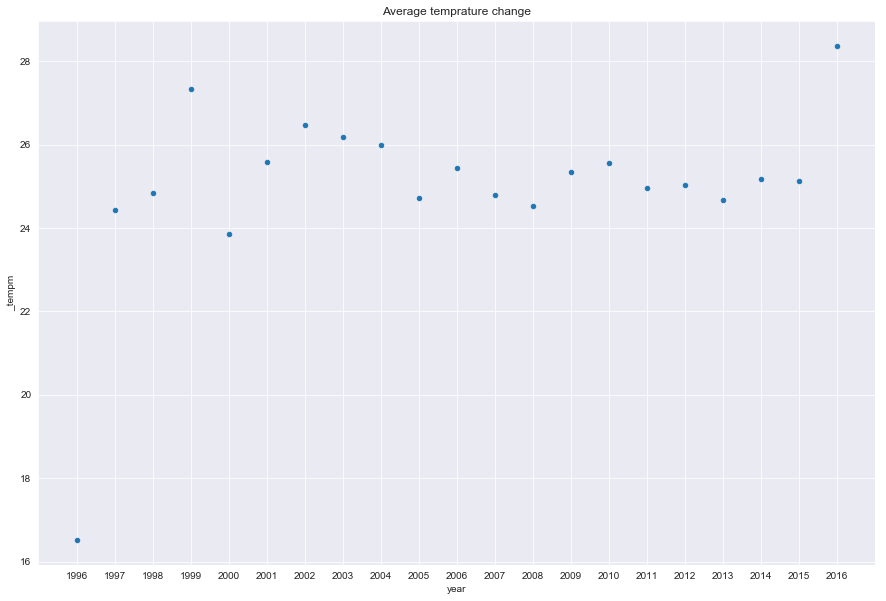

In [35]:
df_mean.plot(kind="scatter", x="year", y="_tempm", figsize=(15, 10))

plt.xticks(df_mean.year);
plt.title("Average temprature change");
plt.plot();

In [36]:
# Visulization part finished

In [37]:
# Now lets check for missing data

In [38]:
df.isnull().sum()

datetime_utc        0
_conds             68
_dewptm           619
_fog                0
_hail               0
_heatindexm     69802
_hum              753
_precipm        98913
_pressurem        231
_rain               0
_snow               0
_tempm            669
_thunder            0
_tornado            0
_vism            4416
_wdird          14380
_wdire          14380
_wgustm         97850
_windchillm     98340
_wspdm           2353
year                0
month               0
dtype: int64

In [39]:
df_filtered = df[['datetime_utc', '_conds', '_dewptm', '_fog', '_hail',
       '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire'
       , '_wspdm', 'year', "month"]]

In [40]:
# Lets replace missing values in _dewptm. We can take an avrgae of that year
df_filtered[df_filtered._dewptm.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
124,19961108-01:00,Smoke,NaN,0,0,NaN,1014.0,0,0,NaN,0,0,2.0,0.0,North,0.0,1996,11
240,19961113-02:00,Smoke,NaN,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11
303,19961116-06:00,Unknown,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11
520,19961126-04:00,Smoke,NaN,0,0,NaN,1017.0,0,0,NaN,0,0,1.6,0.0,North,0.0,1996,11
584,19961129-18:00,Smoke,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,0.7,0.0,North,0.0,1996,11
812,19961210-09:00,Haze,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,5.0,290.0,WNW,18.5,1996,12
820,19961210-17:00,Unknown,NaN,0,0,NaN,1017.0,0,0,NaN,0,0,1.2,0.0,North,0.0,1996,12
830,19961211-07:00,Unknown,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,12
858,19961212-19:00,Smoke,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,1.0,0.0,North,0.0,1996,12
969,19961218-00:00,Shallow Fog,NaN,1,0,NaN,1018.0,0,0,NaN,0,0,0.6,230.0,SW,3.7,1996,12


In [41]:
# We will try to replace value with average value of that year
for index,row in df_filtered[df_filtered._dewptm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._dewptm.mean()
    df_filtered.at[index, "_dewptm"] = mean_val
    

In [42]:
df_filtered[df_filtered._dewptm.isnull()] # We replaced null values for _dewtmp

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month


In [43]:
df_filtered.shape

(98913, 18)

In [45]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             68
_dewptm             0
_fog                0
_hail               0
_hum              753
_pressurem        231
_rain               0
_snow               0
_tempm            669
_thunder            0
_tornado            0
_vism            4416
_wdird          14380
_wdire          14380
_wspdm           2353
year                0
month               0
dtype: int64

In [46]:
# Handle _hum column.
df_filtered[df_filtered._hum.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
124,19961108-01:00,Smoke,5.992851,0,0,NaN,1014.0,0,0,NaN,0,0,2.0,0.0,North,0.0,1996,11
240,19961113-02:00,Smoke,5.992851,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11
303,19961116-06:00,Unknown,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11
520,19961126-04:00,Smoke,5.992851,0,0,NaN,1017.0,0,0,NaN,0,0,1.6,0.0,North,0.0,1996,11
584,19961129-18:00,Smoke,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,0.7,0.0,North,0.0,1996,11
812,19961210-09:00,Haze,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,5.0,290.0,WNW,18.5,1996,12
820,19961210-17:00,Unknown,5.992851,0,0,NaN,1017.0,0,0,NaN,0,0,1.2,0.0,North,0.0,1996,12
830,19961211-07:00,Unknown,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,12
858,19961212-19:00,Smoke,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,1.0,0.0,North,0.0,1996,12
969,19961218-00:00,Shallow Fog,5.992851,1,0,NaN,1018.0,0,0,NaN,0,0,0.6,230.0,SW,3.7,1996,12


In [47]:
# We will use the same logic o replace as we did before.
# We will try to replace value with average value of that year
for index,row in df_filtered[df_filtered._hum.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._hum.mean()
    df_filtered.at[index, "_hum"] = mean_val

In [48]:
df_filtered[df_filtered._hum.isnull()] # replaced

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month


In [49]:
df_filtered.isnull().sum() # Now lets handle _pressurem

datetime_utc        0
_conds             68
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem        231
_rain               0
_snow               0
_tempm            669
_thunder            0
_tornado            0
_vism            4416
_wdird          14380
_wdire          14380
_wspdm           2353
year                0
month               0
dtype: int64

In [50]:
df_filtered[df_filtered._pressurem.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
60703,20040625-21:00,Haze,21.0,0,0,62.0,NaN,0,0,26.0,0,0,2.0,NaN,NaN,0.0,2004,06
60723,20040628-09:00,Haze,20.0,0,0,27.0,NaN,0,0,37.0,0,0,4.0,0.0,North,3.7,2004,06
60728,20040629-00:00,Haze,21.0,0,0,63.0,NaN,0,0,27.0,0,0,2.0,NaN,NaN,0.0,2004,06
60921,20040723-09:00,Haze,24.0,0,0,37.0,NaN,0,0,37.0,0,0,2.0,NaN,NaN,0.0,2004,07
61255,20040829-18:00,Haze,27.0,0,0,75.0,NaN,0,0,31.0,0,0,2.0,NaN,NaN,0.0,2004,08
61270,20040831-15:00,Haze,24.0,0,0,54.0,NaN,0,0,31.0,0,0,2.0,NaN,NaN,0.0,2004,08
61394,20040911-09:00,Haze,21.0,0,0,38.0,NaN,0,0,34.0,0,0,4.0,230.0,SW,7.4,2004,09
62409,20050114-03:00,Smoke,7.0,0,0,64.0,NaN,0,0,12.0,0,0,1.0,250.0,WSW,3.7,2005,01
62501,20050125-15:00,Haze,10.0,0,0,84.0,NaN,0,0,12.0,0,0,1.0,NaN,NaN,0.0,2005,01
63218,20050426-15:00,Haze,16.0,0,0,31.0,NaN,0,0,30.0,0,0,2.0,NaN,NaN,0.0,2005,04


In [51]:
df_filtered.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11


In [52]:
df_filtered._pressurem.replace(-9999.0, np.nan, inplace=True)

c:\users\chirag saini\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:6576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [53]:
df_filtered.head() # so now -9999.0 is Nan.Lets again get the number of missing values in _pressurem

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,32.0,NaN,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,44.0,NaN,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11


In [54]:
df_filtered._pressurem.isnull().sum()

980

In [55]:
for index,row in df_filtered[df_filtered._pressurem.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._pressurem.mean()
    df_filtered.at[index, "_pressurem"] = mean_val

In [56]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             68
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm            669
_thunder            0
_tornado            0
_vism            4416
_wdird          14380
_wdire          14380
_wspdm           2353
year                0
month               0
dtype: int64

In [57]:
for index,row in df_filtered[df_filtered._tempm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._tempm.mean()
    df_filtered.at[index, "_tempm"] = mean_val

In [58]:
for index,row in df_filtered[df_filtered._vism.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._vism.mean()
    df_filtered.at[index, "_vism"] = mean_val

In [59]:
for index,row in df_filtered[df_filtered._wdird.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wdird.mean()
    df_filtered.at[index, "_wdird"] = mean_val

In [60]:
for index,row in df_filtered[df_filtered._wspdm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wspdm.mean()
    df_filtered.at[index, "_wspdm"] = mean_val

In [61]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             68
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm              0
_thunder            0
_tornado            0
_vism               0
_wdird              0
_wdire          14380
_wspdm              0
year                0
month               0
dtype: int64

In [62]:
# As we can see _wdire is a categorical feature so we can not apply mean here. We have to get the most frequent
# value of _wdire for a year and then replace missing value with the most frequent value.
for index,row in df_filtered[df_filtered._wdire.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._wdire.value_counts().idxmax()
    df_filtered.at[index, "_wdire"] = most_frequent

In [63]:
df_filtered.isnull().sum()

datetime_utc     0
_conds          68
_dewptm          0
_fog             0
_hail            0
_hum             0
_pressurem       0
_rain            0
_snow            0
_tempm           0
_thunder         0
_tornado         0
_vism            0
_wdird           0
_wdire           0
_wspdm           0
year             0
month            0
dtype: int64

In [64]:
# now we can see,  _conds which is again acategorical feature.
# so we will apply again the same strategy as above(_wdire)
for index,row in df_filtered[df_filtered._conds.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._conds.value_counts().idxmax()
    df_filtered.at[index, "_conds"] = most_frequent

In [65]:
df_filtered.isnull().sum()

datetime_utc    0
_conds          0
_dewptm         0
_fog            0
_hail           0
_hum            0
_pressurem      0
_rain           0
_snow           0
_tempm          0
_thunder        0
_tornado        0
_vism           0
_wdird          0
_wdire          0
_wspdm          0
year            0
month           0
dtype: int64

In [66]:
# Finally all values are replaced

In [67]:
df_filtered.year = df_filtered.year.astype("object")
df_filtered.month = df_filtered.month.astype("object")

c:\users\chirag saini\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5086: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


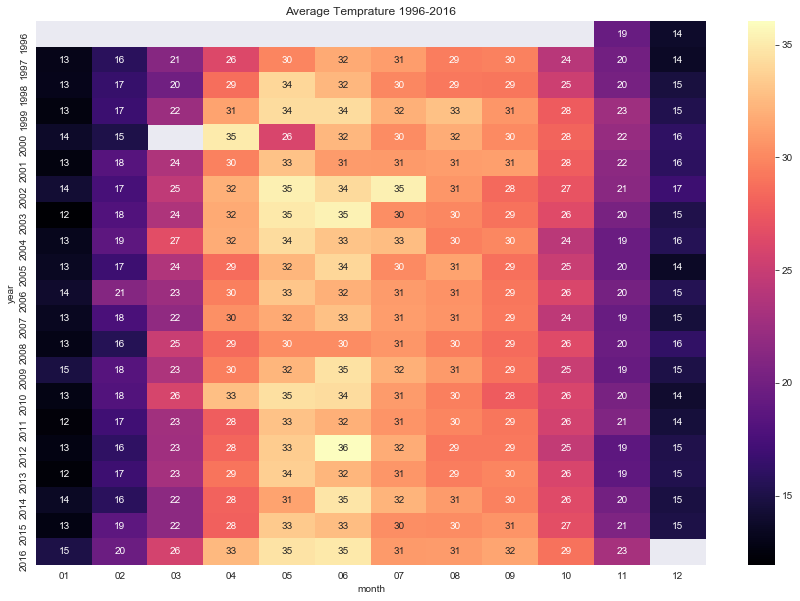

In [69]:
plt.figure(figsize=(15, 10));
sns.heatmap(pd.crosstab(df_filtered.year, [df_filtered.month], values=df_filtered._tempm, aggfunc="mean"),
            cmap="magma", annot=True, cbar=True);
plt.title("Average Temprature 1996-2016")
plt.plot();

In [70]:
df_filtered._conds.value_counts()

Haze                             46955
Smoke                            20334
Mist                              8999
Clear                             3129
Widespread Dust                   2830
Fog                               2541
Scattered Clouds                  2197
Partly Cloudy                     2064
Shallow Fog                       1859
Mostly Cloudy                     1520
Light Rain                        1297
Partial Fog                        962
Patches of Fog                     816
Thunderstorms and Rain             471
Light Drizzle                      410
Heavy Fog                          407
Rain                               394
Unknown                            378
Blowing Sand                       358
Overcast                           313
Thunderstorm                       190
Light Thunderstorms and Rain       170
Drizzle                            111
Light Thunderstorm                  63
Light Fog                           52
Heavy Rain               

In [71]:
# now lets work on feature and target matrix

In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [73]:
df_filtered.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wdire', '_wspdm', 'year', 'month'],
      dtype='object')

In [74]:
feature_columns = ['_wdire', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wspdm', 'year', 'month', '_conds']

In [75]:
df_final = df_filtered[feature_columns]

In [76]:
df_final._wdire.value_counts()

North       19534
West        19121
NW          12901
WNW          7211
East         7092
WSW          5378
ESE          5249
ENE          3685
SE           3462
SW           3153
NNW          2647
NE           2470
SSE          2034
NNE          1731
SSW          1706
South        1534
Variable        5
Name: _wdire, dtype: int64

In [77]:
wdire_dummies = pd.get_dummies(df_final["_wdire"])

In [78]:
df_final = pd.concat([wdire_dummies, df_final], axis=1)

In [79]:
df_final.head()

,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,...,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month,_conds
0,0,0,0,0,0,0,0,0,0,0,...,0,30.0,0,0,5.000000,280.0,7.400000,1996,11,Smoke
1,0,0,0,0,0,0,0,1,0,0,...,0,28.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
2,0,0,0,0,0,0,0,1,0,0,...,0,24.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
3,0,0,0,0,0,0,0,1,0,0,...,0,24.0,0,0,2.000000,0.0,5.052735,1996,11,Smoke
4,0,0,0,0,0,0,0,1,0,0,...,0,23.0,0,0,1.200000,0.0,0.000000,1996,11,Smoke


In [80]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_wdire',
       '_dewptm', '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow',
       '_tempm', '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year',
       'month', '_conds'],
      dtype='object')

In [81]:
df_final.drop("_wdire", inplace=True, axis=1)

In [82]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_dewptm',
       '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year', 'month',
       '_conds'],
      dtype='object')

In [83]:
X = df_final.iloc[:, 0:-1].values
X.shape

(98913, 32)

In [84]:
y = df_final.iloc[:, -1].values

In [85]:
label_encoder = LabelEncoder()

In [86]:
y = label_encoder.fit_transform(y)

In [87]:
y.shape

(98913,)

In [88]:
# now lets do some modelling

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0) 
# test size =0.25 or 25%

In [91]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (74184, 32)
Shape of X_test (24729, 32)
Shape of y_train (74184,)
Shape of y_test (24729,)


In [92]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)

In [107]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [108]:
y_pred = clf.predict(X_test)

In [109]:
y_pred

array([ 3, 20,  5, ..., 31,  5, 31])

In [110]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.7811072020704436


In [112]:
import pickle

In [111]:
pickle.dump(clf, open("Decision_tree_model.sav", 'wb'))